In [165]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [166]:
from bs4 import BeautifulSoup
import requests

# Get list of American Cities

In [167]:
#List of cities from wiki
html_doc= "https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"
html= requests.get(html_doc).text
soup= BeautifulSoup(html,'lxml')
table = soup.find_all('table')[4]
data_list = pd.read_html(str(table))
df=pd.DataFrame(data_list[0])
df.columns = df.iloc[0]
df.drop([0], inplace = True)
#keep city name and coordinates
df=df.iloc[:,[1,10]]
df.columns = df.columns.fillna('Coordinates') 
df


,City,Coordinates
1,New York[d],40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W
2,Los Angeles,34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W
3,Chicago,41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W
4,Houston[3],29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W
5,Phoenix,33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°W
6,Philadelphia[e],40°00′34″N 75°08′00″W﻿ / ﻿40.0094°N 75.1333°W
7,San Antonio,29°28′21″N 98°31′30″W﻿ / ﻿29.4724°N 98.5251°W
8,San Diego,32°48′55″N 117°08′06″W﻿ / ﻿32.8153°N 117.1350°W
9,Dallas,32°47′36″N 96°45′59″W﻿ / ﻿32.7933°N 96.7665°W
10,San Jose,37°17′48″N 121°49′08″W﻿ / ﻿37.2967°N 121.8189°W


In [4]:
#Clean coordinates and create lat and long columns
df['Coords'] = df['Coordinates'].str.split('/ ').str[1]
df['Latitude']=df['Coords'].str.split('°N ').str[0]
df['Longitude']=df['Coords'].str.split('°N ').str[1]
df['Longitude']=df['Longitude'].str.split('°W').str[0]
df['Longitude'] = df['Longitude'].astype(float)
#There was some weird character(s) in front of latitude that prevented it from being converted into string
#So line of code below eliminates it
df['Latitude']=df['Latitude'].str[1:]
df['Latitude'] = df['Latitude'].astype(float)
#Longitude from wiki was positive but denoted as west. So converted to proper negative values
df['Longitude'] = df['Longitude']*-1
cities=df[['City', 'Latitude', 'Longitude']]
cities=cities.head(100)
cities


,City,Latitude,Longitude
1,New York[d],40.6635,-73.9387
2,Los Angeles,34.0194,-118.4108
3,Chicago,41.8376,-87.6818
4,Houston[3],29.7866,-95.3909
5,Phoenix,33.5722,-112.0901
6,Philadelphia[e],40.0094,-75.1333
7,San Antonio,29.4724,-98.5251
8,San Diego,32.8153,-117.1350
9,Dallas,32.7933,-96.7665
10,San Jose,37.2967,-121.8189


In [425]:
# create map of US using latitude and longitude values
latitude=40.6635
longitude=-115.9387
map_US = folium.Map(location=[latitude, longitude], zoom_start=3.4)

# add markers to map
for lat, lng, city in zip(cities['Latitude'], cities['Longitude'], cities['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_US)  
    
map_US

# Find out which venues are most popular in each city

In [169]:
#name variables to use in 4square url
CLIENT_ID = 'O2WP1ZDLIE2MELGB1CCKTMKCQCXTPYB2LUOZKN3EFEV1MOW5' # your Foursquare ID
CLIENT_SECRET = 'RAL1PSZQSDGDJ5S43KIUXZ0YDHXJP05XK0GMXLOUQJ0RTNC0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: O2WP1ZDLIE2MELGB1CCKTMKCQCXTPYB2LUOZKN3EFEV1MOW5
CLIENT_SECRET:RAL1PSZQSDGDJ5S43KIUXZ0YDHXJP05XK0GMXLOUQJ0RTNC0


In [170]:
#create a function to explore venues in cities
radius = 50000 
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=100000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [171]:
#call the function on our neighborhoods using their lats and longs
US_venues = getNearbyVenues(names=cities['City'],
                                   latitudes=cities['Latitude'],
                                   longitudes=cities['Longitude'])

New York[d]
Los Angeles
Chicago
Houston[3]
Phoenix
Philadelphia[e]
San Antonio
San Diego
Dallas
San Jose
Austin
Jacksonville[f]
Fort Worth
Columbus
San Francisco[g]
Charlotte
Indianapolis[h]
Seattle
Denver[i]
Washington[j]
Boston
El Paso
Detroit
Nashville[k]
Portland
Memphis
Oklahoma City
Las Vegas
Louisville[l]
Baltimore[m]
Milwaukee
Albuquerque
Tucson
Fresno
Mesa
Sacramento
Atlanta
Kansas City
Colorado Springs
Miami
Raleigh
Omaha
Long Beach
Virginia Beach[m]
Oakland
Minneapolis
Tulsa
Arlington
Tampa
New Orleans[n]
Wichita
Cleveland
Bakersfield
Aurora
Anaheim
Honolulu[b]
Santa Ana
Riverside
Corpus Christi
Lexington[o]
Stockton
Henderson
Saint Paul
St. Louis[m]
Cincinnati
Pittsburgh
Greensboro
Anchorage[p]
Plano
Lincoln
Orlando
Irvine
Newark
Toledo
Durham
Chula Vista
Fort Wayne
Jersey City
St. Petersburg
Laredo
Madison
Chandler
Buffalo
Lubbock
Scottsdale
Reno
Glendale
Gilbert[q]
Winston–Salem
North Las Vegas
Norfolk[m]
Chesapeake[m]
Garland
Irving
Hialeah
Fremont
Boise[r]
Richmond[m]
B

In [172]:
#call shape to tell us how many venues there are
print(US_venues.shape)
#determine how many unique venue categories there are
print('There are {} uniques categories.'.format(len(US_venues['Venue Category'].unique())))
US_venues.head()

(10000, 7)
There are 349 uniques categories.


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York[d],40.6635,-73.9387,Kings Theatre,40.646110,-73.957175,Theater
1,New York[d],40.6635,-73.9387,Covenhoven,40.675143,-73.960203,Beer Bar
2,New York[d],40.6635,-73.9387,Brooklyn Botanic Garden,40.667622,-73.963191,Botanical Garden
3,New York[d],40.6635,-73.9387,Prospect Park,40.661971,-73.971226,Park
4,New York[d],40.6635,-73.9387,Long Meadow,40.668758,-73.970304,Field


In [173]:
# one hot encoding
US_onehot = pd.get_dummies(US_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
US_onehot['City'] = US_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [US_onehot.columns[-1]] + list(US_onehot.columns[:-1])
US_onehot = US_onehot[fixed_columns]


In [174]:
US_onehot.head()
#US_onehot.shape

,City,Accessories Store,Adult Boutique,Afghan Restaurant,Airport Service,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bavarian Restaurant,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Canal,Candy Store,Capitol Building,Caribbean Restaurant,Casino,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Football Field,College Gym,College Quad,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dive Spot,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hunan Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Observatory,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoor Supply Store,Park,Pawn Shop,Pedestrian Plaza,Pelmeni House,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Racecourse,Racetrack,Radio Station,Ramen Restaurant,Record Shop,Reservoir,Residential Building (Apartment / Condo),Resort,Restaurant,River,Road,Rock Club,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe

In [17]:
US_grouped = US_onehot.groupby('City').mean().reset_index()

US_grouped.shape

(100, 350)

In [175]:
#creat a function to return the top venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [176]:
#call function to find top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
#del City_venues_sorted
City_venues_sorted = pd.DataFrame(columns=columns)
City_venues_sorted['City'] = US_grouped['City']

for ind in np.arange(US_grouped.shape[0]):
    City_venues_sorted.iloc[ind, 1:] = return_most_common_venues(US_grouped.iloc[ind, :], num_top_venues)

City_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albuquerque,Brewery,Pizza Place,American Restaurant,Mexican Restaurant,Grocery Store,Café,Coffee Shop,BBQ Joint,Steakhouse,Vietnamese Restaurant
1,Anaheim,Beach,Theme Park,Theme Park Ride / Attraction,Park,Grocery Store,Brewery,Garden,Italian Restaurant,Art Gallery,Ice Cream Shop
2,Anchorage[p],Mexican Restaurant,Brewery,Coffee Shop,Ice Cream Shop,Park,Restaurant,Movie Theater,Seafood Restaurant,Bakery,Trail
3,Arlington,Grocery Store,Brewery,Art Museum,Seafood Restaurant,Fast Food Restaurant,Coffee Shop,Hotel,Burger Joint,Gourmet Shop,BBQ Joint
4,Atlanta,Trail,Park,Brewery,Grocery Store,Mediterranean Restaurant,Ice Cream Shop,Beer Store,American Restaurant,Sandwich Place,Museum


In [177]:
US_grouped_clustering = US_grouped.drop('City', 1)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(US_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

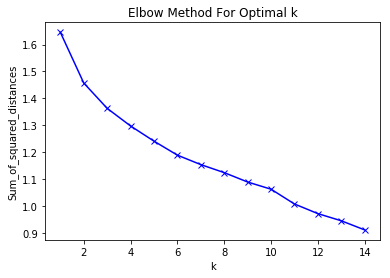

In [178]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Use k means clustering to group cities based on similarities in top ten most common venues

In [179]:
# set number of clusters
kclusters = 5

US_grouped_clustering = US_grouped.drop('City', 1)

# run k-means clustering fit
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(US_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 2, 3, 2, 2, 2, 1, 2, 3], dtype=int32)

In [180]:
# add clustering labels

City_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

US_merged = cities

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
US_merged = US_merged.join(City_venues_sorted.set_index('City'), on='City', how='right')


US_merged.sort_values(by=['Cluster Labels'])

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
40,Miami,25.7752,-80.2086,0,Beach,Hotel,Park,Seafood Restaurant,Peruvian Restaurant,Grocery Store,Italian Restaurant,Bar,Bakery,Trail
43,Long Beach,33.8092,-118.1553,0,Beach,Theme Park,Theme Park Ride / Attraction,Brewery,Grocery Store,Park,Scenic Lookout,Italian Restaurant,Theater,Coffee Shop
58,Riverside,33.9381,-117.3932,0,Beach,Theme Park,Theme Park Ride / Attraction,Grocery Store,Park,Italian Restaurant,Brewery,Garden,Scenic Lookout,Museum
57,Santa Ana,33.7363,-117.8830,0,Beach,Theme Park,Theme Park Ride / Attraction,Park,Grocery Store,Brewery,Art Gallery,Italian Restaurant,Garden,Scenic Lookout
55,Anaheim,33.8555,-117.7601,0,Beach,Theme Park,Theme Park Ride / Attraction,Park,Grocery Store,Brewery,Garden,Italian Restaurant,Art Gallery,Ice Cream Shop
71,Orlando,28.4166,-81.2736,0,Theme Park Ride / Attraction,American Restaurant,Grocery Store,Convenience Store,Pizza Place,Ice Cream Shop,Theme Park,Italian Restaurant,Resort,Cuban Restaurant
8,San Diego,32.8153,-117.1350,0,Brewery,Beach,Park,Zoo Exhibit,Ice Cream Shop,Seafood Restaurant,Grocery Store,Farmers Market,Coffee Shop,Hotel
72,Irvine,33.6784,-117.7713,0,Beach,Theme Park,Theme Park Ride / Attraction,Park,Brewery,Grocery Store,Art Gallery,Garden,Italian Restaurant,Scenic Lookout
95,Hialeah,25.8699,-80.3029,0,Grocery Store,Beach,Hotel,American Restaurant,Italian Restaurant,Park,Shopping Mall,Donut Shop,Seafood Restaurant,Resort
2,Los Angeles,34.0194,-118.4108,0,Park,Trail,Beach,Ice Cream Shop,Hotel,Farmers Market,Coffee Shop,Grocery Store,Theme Park Ride / Attraction,Sandwich Place


In [25]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=3.4)
US_merged['Cluster Labels']= US_merged['Cluster Labels'].astype(int)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(US_merged['Latitude'], US_merged['Longitude'], US_merged['City'], US_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [26]:
City_clusters=US_merged[['City', 'Cluster Labels']]

# Make a list of cities most similar to NYC

In [181]:
City_clusters.loc[City_clusters['City'] == 'New York[d]']
#New York label cluster label is?

,City,Cluster Labels
1,New York[d],4


In [182]:
a=City_clusters.loc[City_clusters['City'] == 'New York[d]']
b=a['Cluster Labels']
b=int(b)
type(b)

int

In [183]:
#New DF with all cities in NYC cluster and their venue categories 
NY_cluster=US_merged.loc[US_merged['Cluster Labels'] == b]
NY_cluster

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,New York[d],40.6635,-73.9387,4,Park,Bookstore,Italian Restaurant,Yoga Studio,Theater,Wine Shop,Brewery,Indie Movie Theater,Ice Cream Shop,Garden
6,Philadelphia[e],40.0094,-75.1333,4,Park,Brewery,Coffee Shop,Deli / Bodega,Café,Concert Hall,Pizza Place,Trail,Art Museum,Gym
10,San Jose,37.2967,-121.8189,4,Park,Trail,Beach,State / Provincial Park,Coffee Shop,Bakery,Yoga Studio,Climbing Gym,Wine Shop,Movie Theater
15,San Francisco[g],37.7272,-123.0322,4,Park,Beach,Scenic Lookout,Trail,Bookstore,Bakery,Historic Site,Yoga Studio,Ice Cream Shop,Nature Preserve
21,Boston,42.3320,-71.0202,4,Park,Bakery,Brewery,Seafood Restaurant,Sandwich Place,Indie Movie Theater,Wine Shop,Gym,Mexican Restaurant,Hotel
45,Oakland,37.7698,-122.2257,4,Park,Yoga Studio,Coffee Shop,Trail,Brewery,Art Museum,Wine Shop,Bakery,Movie Theater,Café
49,Tampa,27.9701,-82.4797,4,Park,Scenic Lookout,Pizza Place,Convenience Store,American Restaurant,Theme Park Ride / Attraction,Ice Cream Shop,New American Restaurant,Wine Shop,Beer Garden
61,Stockton,37.9763,-121.3133,4,Park,Trail,Music Venue,Brewery,Coffee Shop,Grocery Store,Burger Joint,Bakery,Scenic Lookout,Café
73,Newark,40.7242,-74.1726,4,Park,Theater,Bookstore,Bakery,Italian Restaurant,Gym,Cycle Studio,Art Gallery,Ice Cream Shop,Taco Place
78,Jersey City,40.7114,-74.0648,4,Park,Bookstore,Italian Restaurant,Theater,Cycle Studio,Ice Cream Shop,Gym,Art Gallery,Taco Place,Bakery


# Determine which venues NYC has that the other cities in the group don't have

In [184]:

x=NY_cluster.loc[NY_cluster['City'] == "New York[d]"]
x=x[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']]
y=x.loc[1].values
ny1ist=y.tolist()
ny1ist
#x.loc[0]
#x=x.loc[0].tolist()


['Park',
 'Bookstore',
 'Italian Restaurant',
 'Yoga Studio',
 'Theater',
 'Wine Shop',
 'Brewery',
 'Indie Movie Theater',
 'Ice Cream Shop',
 'Garden']

In [185]:
ny1ist

['Park',
 'Bookstore',
 'Italian Restaurant',
 'Yoga Studio',
 'Theater',
 'Wine Shop',
 'Brewery',
 'Indie Movie Theater',
 'Ice Cream Shop',
 'Garden']

In [186]:

x=NY_cluster.loc[NY_cluster['City'] == "New York[d]"]
x=x[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']]
nylist=x.loc[1].values
nylist=nylist.tolist()
#print(nylist)

Other=[]
places= NY_cluster['City']
Other=pd.DataFrame()
Common=pd.DataFrame()

Venues=['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']

Diff=pd.DataFrame()
for place in places:  
    x=NY_cluster.loc[NY_cluster['City'] == "New York[d]"]
    x=x[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']]
    nylist=x.loc[1].values
    nylist=nylist.tolist()
    NY_common= nylist
    NY2=nylist
    print(nylist)
    Other=NY_cluster.loc[NY_cluster['City'] == place]
    #Common=Other[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']]
    
    for Venue in Venues:
        item=Other[Venue].values
        if item in NY_common:  
            #print(NY2)
            NY2.remove(item)
    df=pd.DataFrame(NY2,columns=[place])
    Diff=pd.concat([Diff,df],axis=1)
   
#print(Diff)


['Park', 'Bookstore', 'Italian Restaurant', 'Yoga Studio', 'Theater', 'Wine Shop', 'Brewery', 'Indie Movie Theater', 'Ice Cream Shop', 'Garden']
['Park', 'Bookstore', 'Italian Restaurant', 'Yoga Studio', 'Theater', 'Wine Shop', 'Brewery', 'Indie Movie Theater', 'Ice Cream Shop', 'Garden']
['Park', 'Bookstore', 'Italian Restaurant', 'Yoga Studio', 'Theater', 'Wine Shop', 'Brewery', 'Indie Movie Theater', 'Ice Cream Shop', 'Garden']
['Park', 'Bookstore', 'Italian Restaurant', 'Yoga Studio', 'Theater', 'Wine Shop', 'Brewery', 'Indie Movie Theater', 'Ice Cream Shop', 'Garden']
['Park', 'Bookstore', 'Italian Restaurant', 'Yoga Studio', 'Theater', 'Wine Shop', 'Brewery', 'Indie Movie Theater', 'Ice Cream Shop', 'Garden']
['Park', 'Bookstore', 'Italian Restaurant', 'Yoga Studio', 'Theater', 'Wine Shop', 'Brewery', 'Indie Movie Theater', 'Ice Cream Shop', 'Garden']
['Park', 'Bookstore', 'Italian Restaurant', 'Yoga Studio', 'Theater', 'Wine Shop', 'Brewery', 'Indie Movie Theater', 'Ice Cream Sh

In [187]:
x=NY_cluster.loc[NY_cluster['City'] == "New York[d]"]
x=x[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']]
nylist=x.loc[1].values
nylist=nylist.tolist()

In [ ]:
#Find top rest (likes). in a category in NYC, which neighborhoods are they in. pick Boston and find out which 
#neighborhoods in Boston are most similar to the NYC rest neighborhood.

In [188]:
Diff

,New York[d],Philadelphia[e],San Jose,San Francisco[g],Boston,Oakland,Tampa,Stockton,Newark,Jersey City,St. Petersburg,Buffalo,Fremont
0,NaN,Bookstore,Bookstore,Italian Restaurant,Bookstore,Bookstore,Bookstore,Bookstore,Yoga Studio,Yoga Studio,Bookstore,Bookstore,Bookstore
1,NaN,Italian Restaurant,Italian Restaurant,Theater,Italian Restaurant,Italian Restaurant,Italian Restaurant,Italian Restaurant,Wine Shop,Wine Shop,Italian Restaurant,Yoga Studio,Italian Restaurant
2,NaN,Yoga Studio,Theater,Wine Shop,Yoga Studio,Theater,Yoga Studio,Yoga Studio,Brewery,Brewery,Yoga Studio,Theater,Yoga Studio
3,NaN,Theater,Brewery,Brewery,Theater,Indie Movie Theater,Theater,Theater,Indie Movie Theater,Indie Movie Theater,Theater,Wine Shop,Theater
4,NaN,Wine Shop,Indie Movie Theater,Indie Movie Theater,Ice Cream Shop,Ice Cream Shop,Brewery,Wine Shop,Garden,Garden,Wine Shop,Indie Movie Theater,Wine Shop
5,NaN,Indie Movie Theater,Ice Cream Shop,Garden,Garden,Garden,Indie Movie Theater,Indie Movie Theater,NaN,NaN,Indie Movie Theater,Garden,Indie Movie Theater
6,NaN,Ice Cream Shop,Garden,NaN,NaN,NaN,Garden,Ice Cream Shop,NaN,NaN,Garden,NaN,Ice Cream Shop
7,NaN,Garden,NaN,NaN,NaN,NaN,NaN,Garden,NaN,NaN,NaN,NaN,Garden


In [189]:
import matplotlib.pyplot as plt

from matplotlib_venn import venn2


In [194]:
NY=nylist
Bean=NY_cluster.loc[NY_cluster['City'] == 'San Francisco[g]']
Bean.drop(['City', 'Longitude', 'Latitude', 'Cluster Labels'], axis=1, inplace=True)

Bean.reset_index(inplace=True)
Bean.drop(['index'], axis=1, inplace=True)
Bean=Bean.loc[0].tolist()
Bean

['Park',
 'Beach',
 'Scenic Lookout',
 'Trail',
 'Bookstore',
 'Bakery',
 'Historic Site',
 'Yoga Studio',
 'Ice Cream Shop',
 'Nature Preserve']

# Here we chose San Francisco because it has some venues that are similar and some that are different to NYC

<function matplotlib.pyplot.annotate(s, xy, *args, **kwargs)>

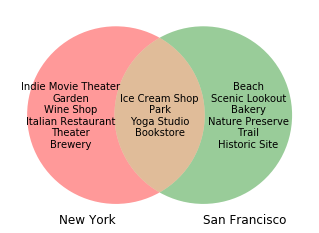

In [197]:
A = set(NY)
B = set(Bean)
C=B-A
v = venn2([A,B], ('New York', 'San Francisco'))

ppp=v.get_label_by_id('100').set_text('\n'.join(A-B))
v.get_label_by_id('110').set_text('\n'.join(A&B))
v.get_label_by_id('010').set_text('\n'.join(C))

plt.annotate

# NYC has many Italian restaraunts and SF does not. Let's choose Italian restaraunts to examine more closely.

# Now we will look at Italian restaurants in different neighborhoods in NYC. What venues are most commonly found in the same neighborhoods as Italian restaurants?

In [213]:
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize 
import json # library to handle JSON files

!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')
NYdata=


SyntaxError: invalid syntax (<ipython-input-213-6875e45247f4>, line 7)

In [214]:
with open('/Users/nnoyes/Downloads/nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [218]:
neighborhoods_data = newyork_data['features']

In [219]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [220]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [221]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [224]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [225]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [226]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [227]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [228]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [229]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [230]:
CLIENT_ID = 'O2WP1ZDLIE2MELGB1CCKTMKCQCXTPYB2LUOZKN3EFEV1MOW5' # your Foursquare ID
CLIENT_SECRET = 'RAL1PSZQSDGDJ5S43KIUXZ0YDHXJP05XK0GMXLOUQJ0RTNC0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: O2WP1ZDLIE2MELGB1CCKTMKCQCXTPYB2LUOZKN3EFEV1MOW5
CLIENT_SECRET:RAL1PSZQSDGDJ5S43KIUXZ0YDHXJP05XK0GMXLOUQJ0RTNC0


In [232]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [233]:
radius = 500
LIMIT=100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?client_id=O2WP1ZDLIE2MELGB1CCKTMKCQCXTPYB2LUOZKN3EFEV1MOW5&client_secret=RAL1PSZQSDGDJ5S43KIUXZ0YDHXJP05XK0GMXLOUQJ0RTNC0&ll=40.87655077879964,-73.91065965862981&v=20180605&radius=500&limit=100'

In [235]:
results = requests.get(url).json()


In [237]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [238]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Blink Fitness Riverdale,Gym,40.877147,-73.905837


In [239]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [240]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards
Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyve

In [249]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculp

In [242]:
manhattan_onehot.shape

(9912, 341)

In [362]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculp

In [289]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [363]:
mp=manhattan_grouped.corr(method='pearson')

In [608]:
#Pearson Correlation list
IR=pd.DataFrame(mp["Italian Restaurant"])
IR=IR.sort_values(by=["Italian Restaurant"], ascending=False)
IR= IR.rename(columns={"Italian Restaurant": "Pearson Correlation with Italian Restaurant"})
IR.head(10)

,Pearson Correlation with Italian Restaurant
Italian Restaurant,1.000000
Sushi Restaurant,0.524317
Lebanese Restaurant,0.498653
Gaming Cafe,0.498653
Eastern European Restaurant,0.498653
Udon Restaurant,0.471621
Gourmet Shop,0.453924
Creperie,0.451432
Electronics Store,0.375364
French Restaurant,0.357963


In [365]:
 df = manhattan_grouped.rename(columns={"Sushi Restaurant":"Sushi_Restaurant","Italian Restaurant": "Italian_Restaurant","Dive Bar": "Dive_Bar", "Concert Hall": "Concert_Hall", "College Arts Building": "College_Arts_Building","Indie Movie Theater": "Indie_Movie_Theater", "College Bookstore": "College_Bookstore"})

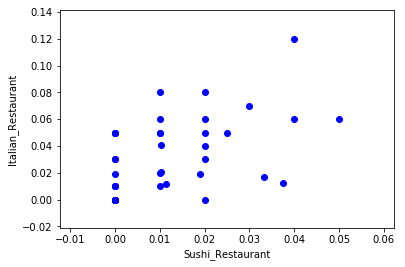

In [369]:
plt.scatter(df.Sushi_Restaurant, df.Italian_Restaurant,  color='blue')
plt.xlabel("Sushi_Restaurant")
plt.ylabel("Italian_Restaurant")
plt.show()

# In NYC, sushi restaraunts are moderately correlated with Italian restaraunts

# Now we will find which neighborhoods have the most popular sushi restaraunts in SF. This will be a good place to put our Italian restaurant.

In [391]:
#Find most popular SF Sushi Restaurant
City_index=cities.set_index("City")
City_index.loc['San Francisco[g]']

0
Latitude      37.7272
Longitude   -123.0322
Name: San Francisco[g], dtype: float64

In [419]:
search_query = 'Sushi'
radius = 50000
latitude = 37.7749 

longitude = -122.4194
SFurl = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
SFurl

'https://api.foursquare.com/v2/venues/search?client_id=O2WP1ZDLIE2MELGB1CCKTMKCQCXTPYB2LUOZKN3EFEV1MOW5&client_secret=RAL1PSZQSDGDJ5S43KIUXZ0YDHXJP05XK0GMXLOUQJ0RTNC0&ll=37.7749,-122.4194&v=20180605&query=Sushi&radius=50000&limit=100'

In [420]:
SFresults = requests.get(SFurl).json()
SFresults

{'meta': {'code': 200, 'requestId': '5dd98f63c8cff2001c00a68b'},
 'response': {'venues': [{'id': '5989205d64c8e12750122427',
    'name': 'Kuma Sushi + Sake',
    'location': {'address': '1040 Polk St',
     'lat': 37.7867804695193,
     'lng': -122.41988550891186,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.7867804695193,
       'lng': -122.41988550891186}],
     'distance': 1323,
     'postalCode': '94109',
     'cc': 'US',
     'neighborhood': 'Lower Nob Hill',
     'city': 'San Francisco',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['1040 Polk St',
      'San Francisco, CA 94109',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1d2941735',
      'name': 'Sushi Restaurant',
      'pluralName': 'Sushi Restaurants',
      'shortName': 'Sushi',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/sushi_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1574539109',
    'hasPe

In [421]:
# assign relevant part of JSON to venues
SFvenues = SFresults['response']['venues']

# tranform venues into a dataframe
SFdataframe = json_normalize(SFvenues)
SFdataframe

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,5989205d64c8e12750122427,1040 Polk St,US,San Francisco,United States,NaN,1323,"[1040 Polk St, San Francisco, CA 94109, United...","[{'label': 'display', 'lat': 37.7867804695193,...",37.786780,-122.419886,Lower Nob Hill,94109,CA,Kuma Sushi + Sake,v-1574539109,NaN
1,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,5bb6c9d6e65d0c00396aaf06,1737 Post St Ste 355,US,San Francisco,United States,NaN,1507,"[1737 Post St Ste 355, San Francisco, CA 94115...","[{'label': 'display', 'lat': 37.78529996186033...",37.785300,-122.430382,NaN,94115,CA,Izumi Kaiten Sushi,v-1574539109,NaN
2,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",1156840,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/live-sushi-...,False,4a445686f964a52077a71fe3,2001 17th St,US,San Francisco,United States,Kansas,1790,"[2001 17th St (Kansas), San Francisco, CA 9410...","[{'label': 'display', 'lat': 37.76469373053839...",37.764694,-122.403676,NaN,94103,CA,Live Sushi Bar,v-1574539109,NaN
3,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,4a88b5b1f964a520720720e3,307 Church St,US,San Francisco,United States,at 15th St,1291,"[307 Church St (at 15th St), San Francisco, CA...","[{'label': 'display', 'lat': 37.76600079472057...",37.766001,-122.428823,NaN,94114,CA,Warakubune Sushi Restaurant,v-1574539109,NaN
4,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",323059,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/we-be-sushi...,False,3fd66200f964a5202bee1ee3,538 Valencia St,US,San Francisco,United States,at 16th,1197,"[538 Valencia St (at 16th), San Francisco, CA ...","[{'label': 'display', 'lat': 37.76432492419117...",37.764325,-122.421879,NaN,94110,CA,We Be Sushi,v-1574539109,NaN
5,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,5cbfcfb6f1936e002cbb2c21,41 Franklin St,US,San Francisco,United States,Oak St,147,"[41 Franklin St (Oak St), San Francisco, CA 94...","[{'label': 'display', 'lat': 37.774955, 'lng':...",37.774955,-122.421070,NaN,94102,CA,Nakama Sushi,v-1574539109,NaN
6,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,44c51d02f964a520d1351fe3,1515 Polk St,US,San Francisco,United States,at California St,1781,"[1515 Polk St (at California St), San Francisc...","[{'label': 'display', 'lat': 37.79086747688942...",37.790867,-122.420754,NaN,94109,CA,Nara Sushi,v-1574539109,NaN
7,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,59a24aa726659b0902fb4d04,330 Ofarrell St,US,San Francisco,United States,NaN,1486,"[330 Ofarrell St, San Francisco, CA 94102, Uni...","[{'label': 'display', 'lat': 37.78612386672969...",37.786124,-122.410247,NaN,94102,CA,Oma Sushi,v-1574539109,NaN
8,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",NaN,NaN,NaN,NaN,NaN,NaN,False,4a64cbcef964a520b5c61fe3,529 Powell St,US,San Francisco,United States,at Sutter St,1887,"[529 Powell St (at Sutter St), San Francisco, ...","[{'label': 'display', 'lat': 37.78959216152342...",37.789592,-122.408692,NaN,94108,CA,Maru Sushi,v-1574539109,485720653
9,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,49d6a648f964a520f35c1fe3,1407 Van Ness Ave,US,San Francisco,United States,at Bush St,1548,"[1407 Van Ness Ave (at Bush St), San Francisco...","[{'label': 'dis

In [423]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in SFdataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = SFdataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Kuma Sushi + Sake,Sushi Restaurant,1040 Polk St,US,San Francisco,United States,NaN,1323,"[1040 Polk St, San Francisco, CA 94109, United...","[{'label': 'display', 'lat': 37.7867804695193,...",37.786780,-122.419886,Lower Nob Hill,94109,CA,5989205d64c8e12750122427
1,Izumi Kaiten Sushi,Sushi Restaurant,1737 Post St Ste 355,US,San Francisco,United States,NaN,1507,"[1737 Post St Ste 355, San Francisco, CA 94115...","[{'label': 'display', 'lat': 37.78529996186033...",37.785300,-122.430382,NaN,94115,CA,5bb6c9d6e65d0c00396aaf06
2,Live Sushi Bar,Sushi Restaurant,2001 17th St,US,San Francisco,United States,Kansas,1790,"[2001 17th St (Kansas), San Francisco, CA 9410...","[{'label': 'display', 'lat': 37.76469373053839...",37.764694,-122.403676,NaN,94103,CA,4a445686f964a52077a71fe3
3,Warakubune Sushi Restaurant,Sushi Restaurant,307 Church St,US,San Francisco,United States,at 15th St,1291,"[307 Church St (at 15th St), San Francisco, CA...","[{'label': 'display', 'lat': 37.76600079472057...",37.766001,-122.428823,NaN,94114,CA,4a88b5b1f964a520720720e3
4,We Be Sushi,Sushi Restaurant,538 Valencia St,US,San Francisco,United States,at 16th,1197,"[538 Valencia St (at 16th), San Francisco, CA ...","[{'label': 'display', 'lat': 37.76432492419117...",37.764325,-122.421879,NaN,94110,CA,3fd66200f964a5202bee1ee3
5,Nakama Sushi,Sushi Restaurant,41 Franklin St,US,San Francisco,United States,Oak St,147,"[41 Franklin St (Oak St), San Francisco, CA 94...","[{'label': 'display', 'lat': 37.774955, 'lng':...",37.774955,-122.421070,NaN,94102,CA,5cbfcfb6f1936e002cbb2c21
6,Nara Sushi,Sushi Restaurant,1515 Polk St,US,San Francisco,United States,at California St,1781,"[1515 Polk St (at California St), San Francisc...","[{'label': 'display', 'lat': 37.79086747688942...",37.790867,-122.420754,NaN,94109,CA,44c51d02f964a520d1351fe3
7,Oma Sushi,Sushi Restaurant,330 Ofarrell St,US,San Francisco,United States,NaN,1486,"[330 Ofarrell St, San Francisco, CA 94102, Uni...","[{'label': 'display', 'lat': 37.78612386672969...",37.786124,-122.410247,NaN,94102,CA,59a24aa726659b0902fb4d04
8,Maru Sushi,Japanese Restaurant,529 Powell St,US,San Francisco,United States,at Sutter St,1887,"[529 Powell St (at Sutter St), San Francisco, ...","[{'label': 'display', 'lat': 37.78959216152342...",37.789592,-122.408692,NaN,94108,CA,4a64cbcef964a520b5c61fe3
9,Wayo Sushi,Sushi Restaurant,1407 Van Ness Ave,US,San Francisco,United States,at Bush St,1548,"[1407 Van Ness Ave (at Bush St), San Francisco...","[{'label': 'display', 'lat': 37.788642, 'lng':...",37.788642,-122.422125,NaN,94109,CA,49d6a648f964a520f35c1fe3


In [621]:
#map of sushi restaurants in SF
latitude = 37.7749 

longitude = -122.4194
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12.7) # generate map centred around the Conrad Hotel

# add a red circle marker to represent center of SF
folium.CircleMarker(
    [latitude, longitude],
    radius=0,
    color='None',
    popup='SF',
    fill = False,
    fill_color = 'red',
    fill_opacity = 0
).add_to(venues_map)

# add the sushi restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [521]:
VENUE_ID= "5989205d64c8e12750122427"


In [529]:

likesurl='https://api.foursquare.com/v2/venues/'+VENUE_ID+'/likes'

params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET, v=VERSION)

resp_likes=requests.get(url=likesurl, params=params)

data_likes=json.loads(resp_likes.text)

data_likes
likes = data_likes['response']['likes']

# tranform venues into a dataframe
dataframe = json_normalize(likes)
dataframe['count']

0    152
Name: count, dtype: int64

In [535]:
sushi=dataframe_filtered[['name', 'lat', 'lng', 'postalCode']]
sushi.head()

,name,lat,lng,postalCode
0,Kuma Sushi + Sake,37.786780,-122.419886,94109
1,Izumi Kaiten Sushi,37.785300,-122.430382,94115
2,Live Sushi Bar,37.764694,-122.403676,94103
3,Warakubune Sushi Restaurant,37.766001,-122.428823,94114
4,We Be Sushi,37.764325,-122.421879,94110


In [543]:
ids= dataframe_filtered['id']
likecount=pd.DataFrame()
for i in ids:
    VENUE_ID=i
    likesurl='https://api.foursquare.com/v2/venues/'+VENUE_ID+'/likes'
    params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET, v=VERSION)
    resp_likes=requests.get(url=likesurl, params=params)
    data_likes=json.loads(resp_likes.text)
    data_likes
    likes = data_likes['response']['likes']
    # tranform venues into a dataframe
    dataframe = json_normalize(likes)
    dataframe.head()
    count=dataframe['count']
    likecount=pd.concat([likecount, count])

    

In [605]:
#likecount=likecount.reset_index()

final=pd.concat([sushi, likecount], axis=1)
final.head(10)

,name,lat,lng,postalCode,level_0,index,0
0,Kuma Sushi + Sake,37.786780,-122.419886,94109,0,0,152.0
1,Izumi Kaiten Sushi,37.785300,-122.430382,94115,1,0,8.0
2,Live Sushi Bar,37.764694,-122.403676,94103,2,0,246.0
3,Warakubune Sushi Restaurant,37.766001,-122.428823,94114,3,0,87.0
4,We Be Sushi,37.764325,-122.421879,94110,4,0,39.0
5,Nakama Sushi,37.774955,-122.421070,94102,5,0,6.0
6,Nara Sushi,37.790867,-122.420754,94109,6,0,112.0
7,Oma Sushi,37.786124,-122.410247,94102,7,0,13.0
8,Maru Sushi,37.789592,-122.408692,94108,8,0,105.0
9,Wayo Sushi,37.788642,-122.422125,94109,9,0,92.0


In [592]:
final.columns = ['name', 'lat', 'lng', 'postal_code', 'level', 'index', 'likes']
dflikes=final[['name', 'postal_code', 'likes']]
dflikes.head()

,name,postal_code,likes
0,Kuma Sushi + Sake,94109,152.0
1,Izumi Kaiten Sushi,94115,8.0
2,Live Sushi Bar,94103,246.0
3,Warakubune Sushi Restaurant,94114,87.0
4,We Be Sushi,94110,39.0


In [616]:
postal_likes=dflikes.groupby(['postal_code'])['likes'].sum()
postal_likes
pl=pd.DataFrame(postal_likes)
pl.reset_index(inplace=True)
pl.astype(int)

,postal_code,likes
0,94102,945
1,94103,577
2,94104,3
3,94105,14
4,94108,499
5,94109,482
6,94110,148
7,94111,7
8,94114,336
9,94115,126


In [607]:
#94102 is most popular for sushi
#Map for location of new Italian Restaurant
target_lat=37.774955
target_lng=-122.421070
venues_map = folium.Map(location=[target_lat, target_lng], zoom_start=14) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [target_lat, target_lng],
    radius=10,
    color='red',
    popup='New Business Here!',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)


venues_map